# Water Quality Prediction
Dataset is taken from https://www.kaggle.com/mssmartypants/water-quality

Author: Nilavarasi Sivasankaran.

github: [https://github.com/Nilavarasi]

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

### 1) Download the data, display the column names and the size of the dataset

In [46]:
data = pd.read_csv('./waterQuality1.csv')

data = data[data['is_safe'] != '#NUM!']
data['is_safe'] = data['is_safe'].astype(int)

data.head(6)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1


In [47]:
data.shape

(7996, 21)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   object 
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [49]:
data.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,0.328706,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,0.378113,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


### 2) Process gaps (if possible, fill them in or delete them)

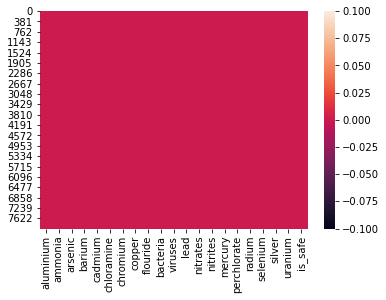

In [50]:
sns.heatmap(data.isna())
plt.show()

### 3) Visualize the data:

build a graph (heatmap) that displays correlations
features among themselves and with the target variable (markup)

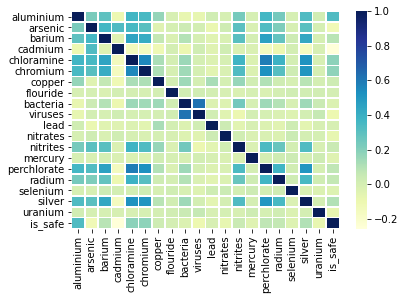

In [51]:
sns.heatmap(data = data.corr(), linewidths = .5, annot = False, cmap = "YlGnBu")
plt.show()

### to construct histograms of distribution of signs

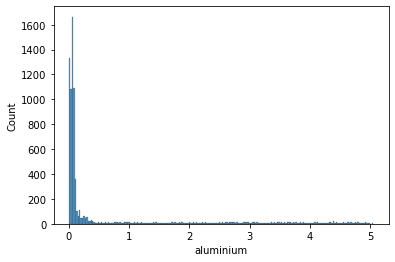

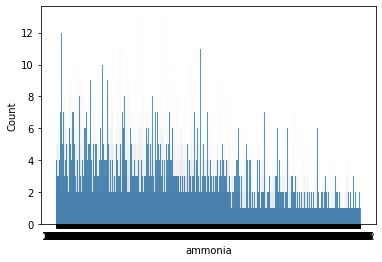

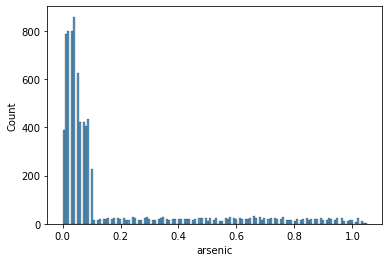

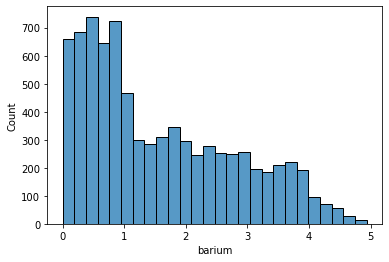

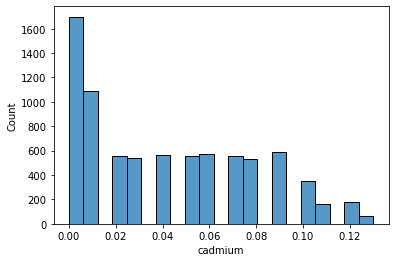

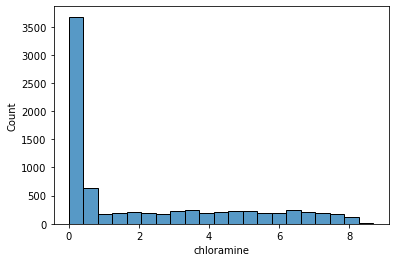

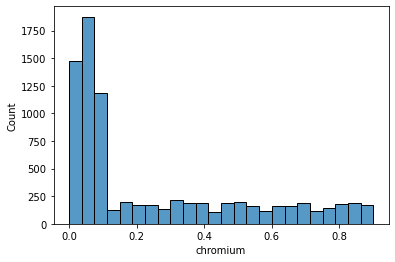

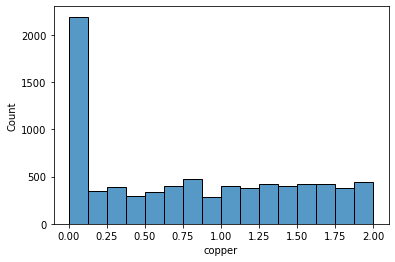

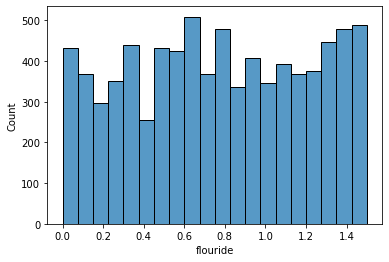

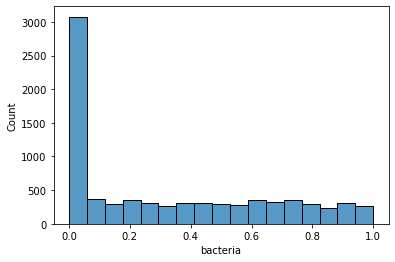

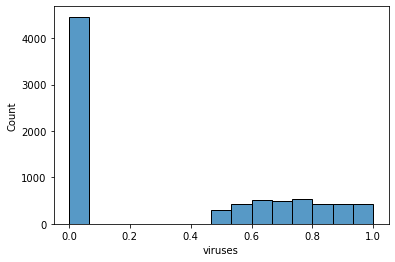

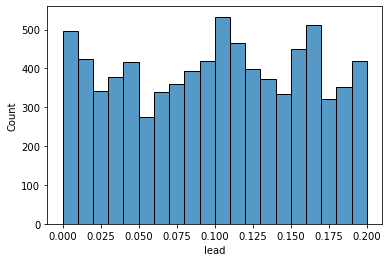

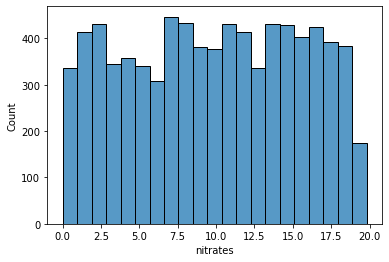

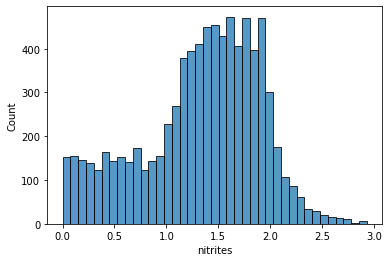

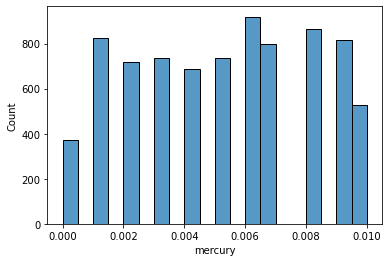

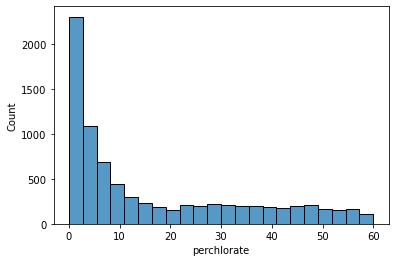

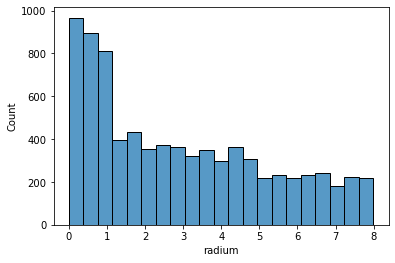

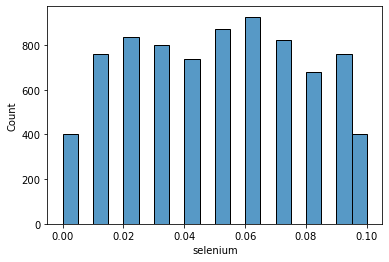

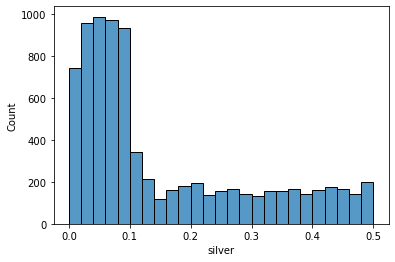

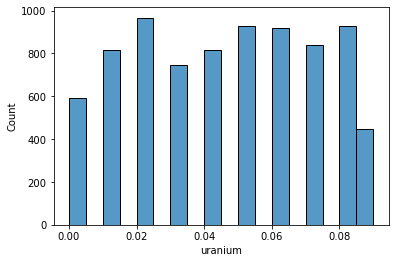

In [25]:
for title in data.columns.values.tolist()[:-1]:
    sns.histplot(data = data, x = title)
    plt.show()

and boxplots of signs relative to the target variable (if there are too many signs
limit yourself to a few)

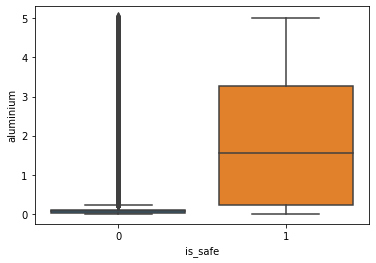

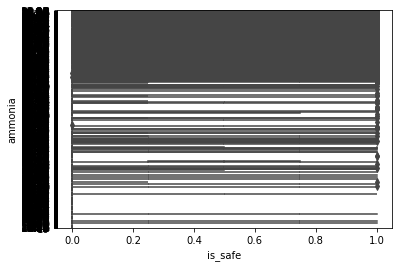

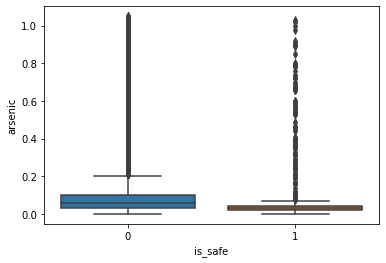

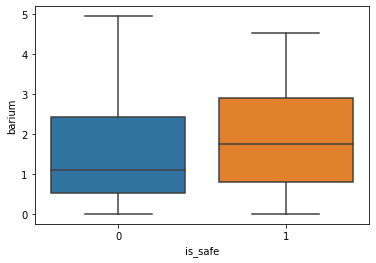

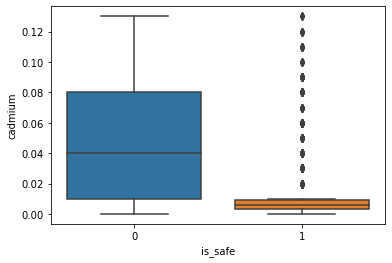

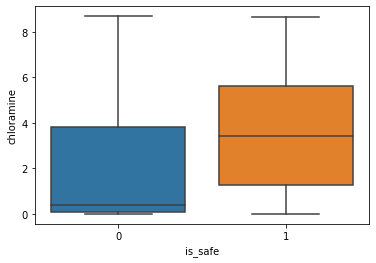

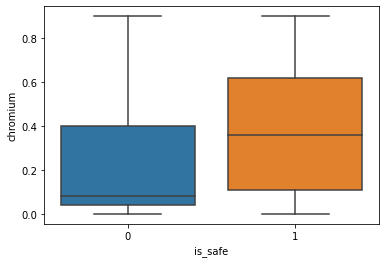

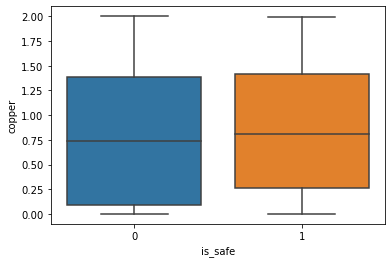

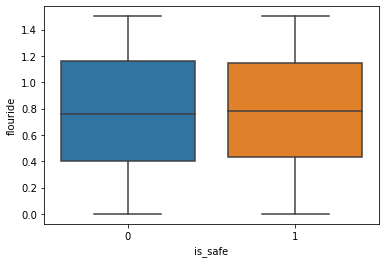

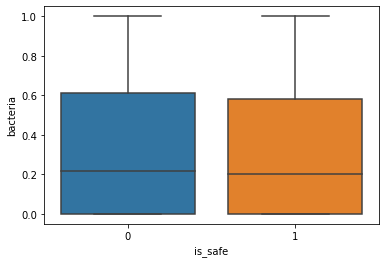

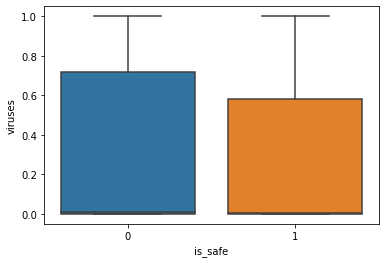

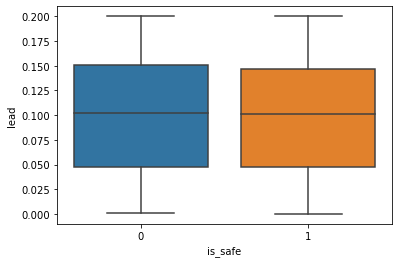

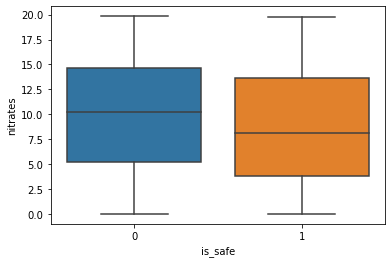

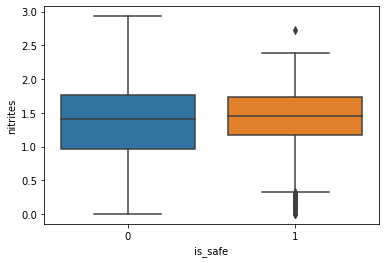

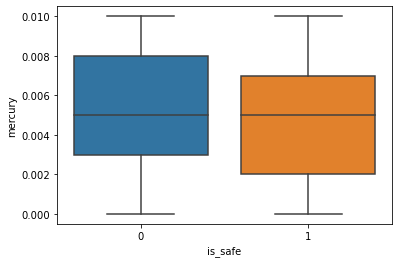

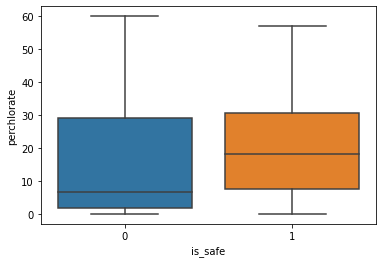

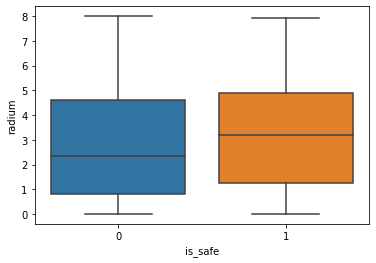

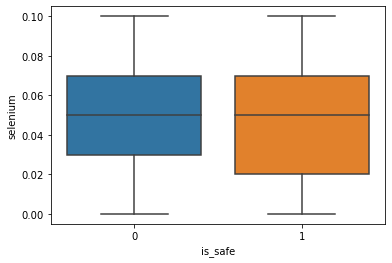

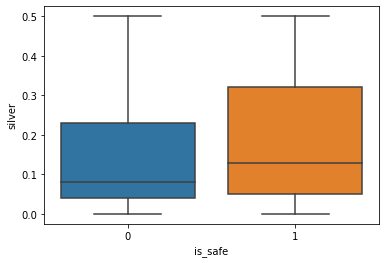

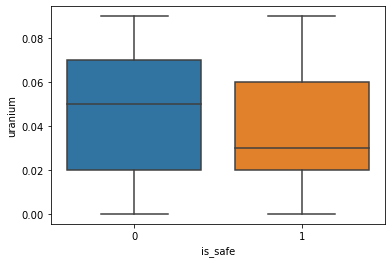

In [26]:
for title in data.columns.values.tolist()[:-1]:
    sns.boxplot(data = data, x = 'is_safe', y = title)
    plt.show()

### 4) Normalize the Data

In [27]:
columns = dict(zip(list(range(data.shape[1])), data.columns.values.tolist()))
is_safe = data['is_safe']

data = pd.DataFrame(StandardScaler().fit_transform(data)).rename(columns = columns)
data['is_safe'] = is_safe
data = data.dropna()

data.head(6)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,0.777403,-0.585491,-0.480875,1.054205,-0.993241,-0.711941,2.152993,-0.973050,-1.657446,-0.363345,...,-0.781070,1.129767,-0.348629,0.609178,1.203362,1.661842,1.053694,1.338736,-0.917040,1.0
1,1.306945,0.775118,-0.599632,1.432447,-1.131948,1.208552,1.598765,-0.223303,0.294799,1.002460,...,0.009785,-1.409197,1.046960,-0.739005,0.892977,0.124811,1.053694,0.851134,0.198023,1.0
2,0.271572,-0.029083,-0.480875,-0.812340,-0.965499,0.803417,1.044536,-1.202564,0.501507,-0.818614,...,-0.368450,0.783298,-0.383518,0.272132,1.911763,1.786699,0.706129,2.035310,-1.288728,0.0
3,0.548198,-0.332067,-0.480875,1.144654,-1.159690,1.968179,-0.802892,1.306793,0.708215,1.184567,...,-1.434385,-1.517469,-0.069511,-0.401960,-0.415275,-0.516695,-1.031700,2.104968,0.198023,1.0
4,0.200439,1.132165,-0.520460,-1.124801,-1.020982,0.191820,1.635713,-0.361012,-0.371261,-0.575804,...,0.302058,-0.555658,-0.383518,-0.739005,0.024578,-0.219622,-1.031700,-0.611672,-0.917040,1.0
5,0.216246,0.021602,-0.520460,1.078873,-1.104207,-0.536643,0.675051,0.878366,-1.519641,1.063162,...,0.611523,-0.012496,0.977180,0.272132,0.605207,1.076306,1.053694,0.293875,-0.917040,1.0


### 5) Data Splitting

In [52]:
X = data.drop('is_safe', axis = 1)
Y = data['is_safe']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 13)

### 6) Decision Tree and Visualization

In [29]:
clf = DecisionTreeClassifier(random_state = 0)
clf.fit(X_train, Y_train)

predict = clf.predict(X_test)

### 7) Looking at the Metrics of the Model

In [30]:
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      2336
         1.0       0.75      0.78      0.77       302

    accuracy                           0.95      2638
   macro avg       0.86      0.87      0.87      2638
weighted avg       0.95      0.95      0.95      2638



In [31]:
print(confusion_matrix(Y_test, predict))

[[2258   78]
 [  66  236]]


In [32]:
print("Accuracy Score of this algorithm is", accuracy_score(Y_test, predict))
print("F1 Score of this model is ", f1_score(Y_test, predict, average='binary'))
print("Recall score of this model is ", recall_score(Y_test, predict, average='binary'))
print("Precision score of this model is ", precision_score(Y_test, predict, average='binary'))

Accuracy Score of this algorithm is 0.9454131918119788
F1 Score of this model is  0.7662337662337663
Recall score of this model is  0.7814569536423841
Precision score of this model is  0.7515923566878981


### 8) Generated Model Visualization as Desicion tree

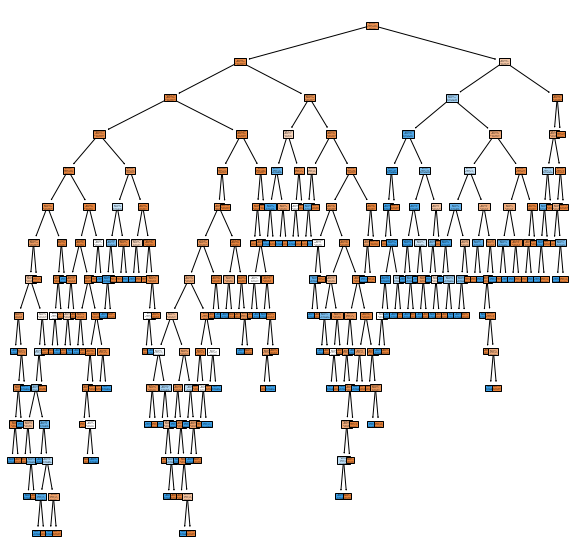

In [33]:
plt.figure(figsize = (10, 10))
plot_tree(clf, feature_names = data.columns.values.tolist(), class_names = ['Safe', 'Dangerous'], filled = True)
plt.show()

### 9) Analysing the feature importance

In [38]:
s = {'col1':X.columns, 'col2':clf.feature_importances_}
df = pd.DataFrame(s)
df_sorted = df.sort_values('col2', ascending=False)

In [39]:
df_sorted

,col1,col2
4,cadmium,0.209506
0,aluminium,0.192066
15,perchlorate,0.164073
18,silver,0.072118
1,ammonia,0.059923
19,uranium,0.049057
12,nitrates,0.038438
16,radium,0.037728
17,selenium,0.033825
13,nitrites,0.026148


### 10) Plot High affecting column of the model

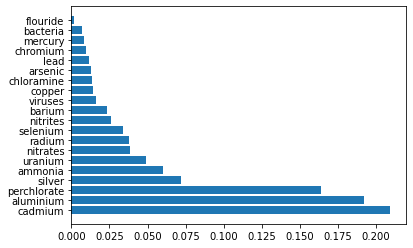

In [40]:
plt.barh(df_sorted["col1"], df_sorted["col2"])
plt.show()